In [ ]:
import numpy as np

from IPython.display import HTML

from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
%matplotlib inline

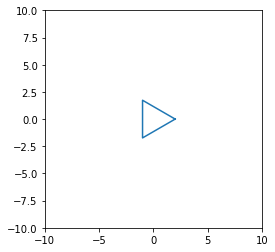

In [ ]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_aspect('equal')
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))

# gerando o polígono
c_x, c_y = 0, 0
r = 2

t = np.linspace(0, 2*np.pi, 4)
triangulo_x = r*np.cos(t) + c_x
triangulo_y = r*np.sin(t) + c_y
triangulo = np.vstack((triangulo_x,
                       triangulo_y,
                       np.ones((4,)))).T

line, = ax.plot(triangulo_x, triangulo_y)

In [ ]:
triangulo

array([[ 2.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [-1.00000000e+00,  1.73205081e+00,  1.00000000e+00],
       [-1.00000000e+00, -1.73205081e+00,  1.00000000e+00],
       [ 2.00000000e+00, -4.89858720e-16,  1.00000000e+00]])

In [ ]:
# initialization function: plot the background of each frame
def init():
    x = triangulo[:,0]
    y = triangulo[:,1]

    line.set_data(x, y)

    line.set_color('green')
    return (line,)








# Modelo de movimentação do objeto implementado na função *animate_1()*

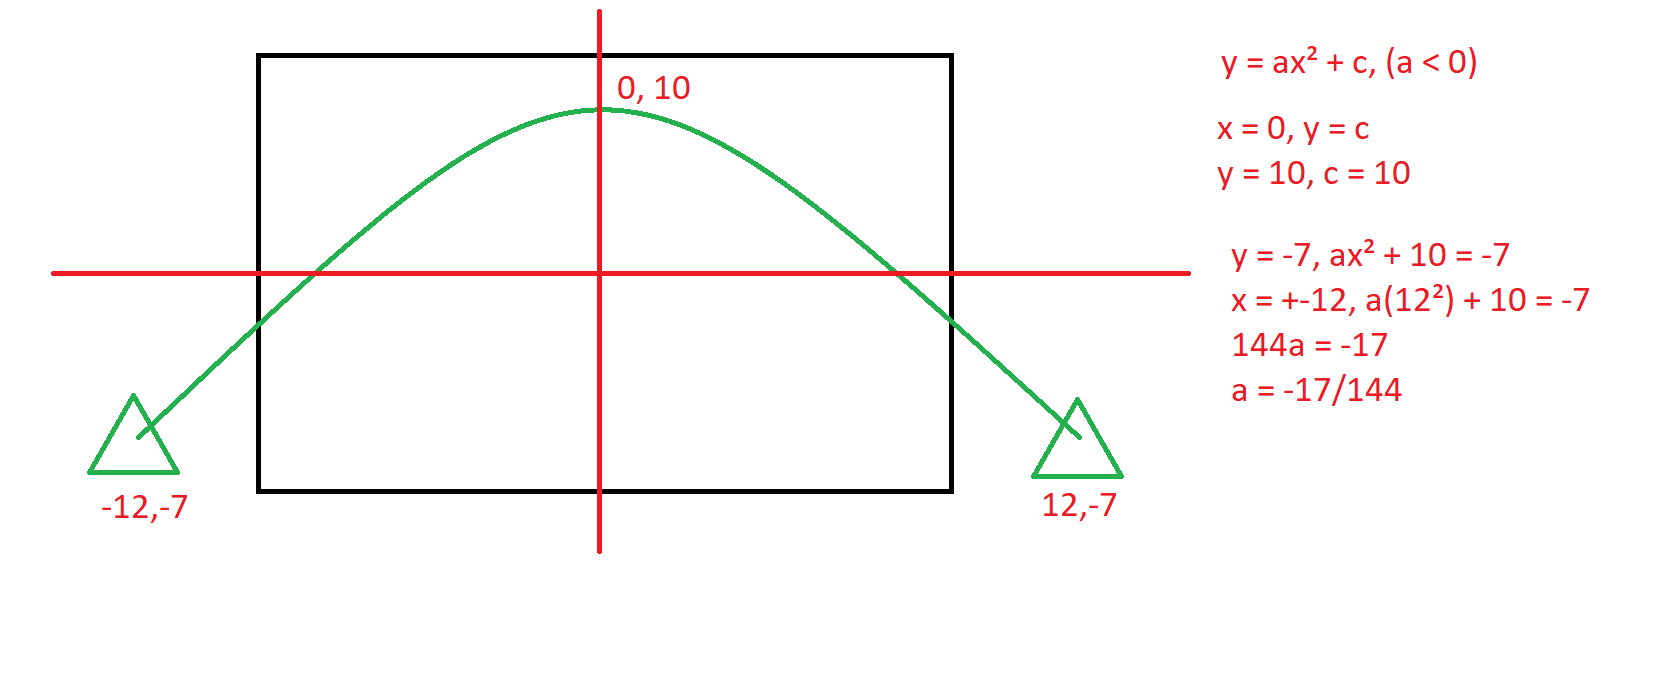

In [ ]:
# animation function. This is called sequentially
def animate_1(i):
    Delta_x = 24
    N_frames = 200
    dx = i * (Delta_x / N_frames)

    a_parabola = -17 / 144
    c_parabola = 10
    dy = c_parabola + a_parabola*(dx + c_x)**2

    translacao = np.array([[1,  0, 0],
                           [0,  1, 0],
                           [dx, dy, 1]])
    
    triangulo_i = np.matmul(triangulo, translacao)
    x = triangulo_i[:,0]
    y = triangulo_i[:,1]
    
    line.set_data(x, y)
    return (line,)

# Modelo de escalonamento

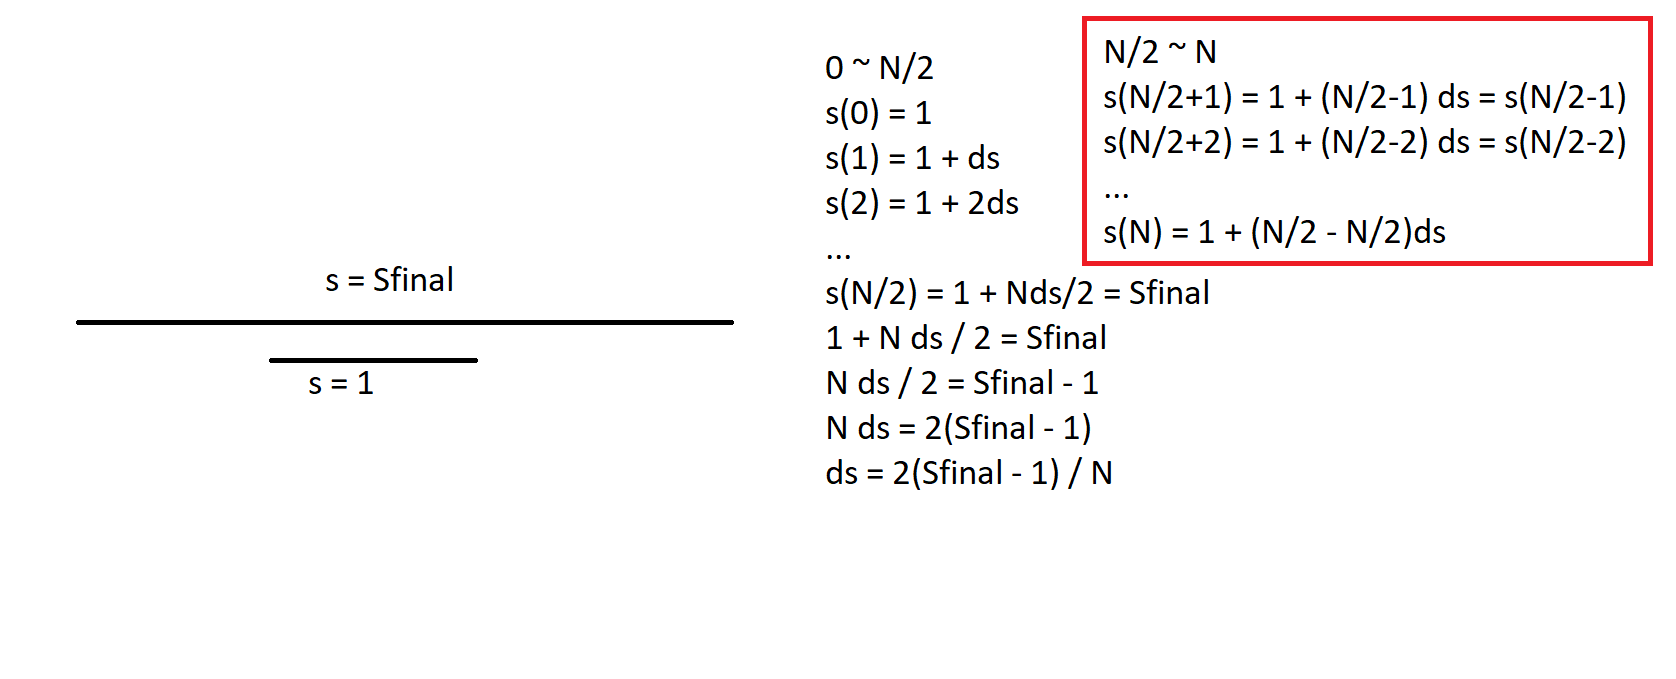

In [ ]:
# animation function. This is called sequentially
def animate_2(i):
    S_final_x = 2
    S_final_y = 4
    N_frames = 200
    if i < 100:
      sx = 1 + i * 2 * ((S_final_x - 1) / N_frames)
      sy = 1 + i * 2 * ((S_final_y - 1) / N_frames)
    else:
      sx = 1 + (N_frames//2 - i%(N_frames//2)) * 2 * ((S_final_x - 1) / N_frames)
      sy = 1 + (N_frames//2 - i%(N_frames//2)) * 2 * ((S_final_y - 1) / N_frames)

    escalonamento = np.array([[sx, 0,  0],
                              [0,  sy, 0],
                              [0,  0,  1]])
    
    triangulo_i = np.matmul(triangulo, escalonamento)
    x = triangulo_i[:,0]
    y = triangulo_i[:,1]
    
    line.set_data(x, y)
    return (line,)

# Modelo de rotação

In [ ]:
# animation function. This is called sequentially
def animate_3(i):
    angulo_total = np.deg2rad(360)
    N_frames = 200
    d_angulo = angulo_total / (N_frames//2)
    angulo = i * d_angulo

    rotacao = np.array([[np.cos(angulo),  np.sin(angulo), 0],
                        [-np.sin(angulo), np.cos(angulo), 0],
                        [0,               0,              1]])
    
    triangulo_i = np.matmul(triangulo, rotacao if i < 100 else rotacao.T)
    x = triangulo_i[:,0]
    y = triangulo_i[:,1]
    
    line.set_data(x, y)
    return (line,)

In [ ]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = FuncAnimation(fig, animate_2, init_func=init,
                     frames=200, interval=50, blit=True)

In [ ]:
HTML(anim.to_html5_video())